In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('./imdb_top_1000.csv')
data.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [3]:
data.describe()

,IMDB_Rating,Meta_score,No_of_Votes
count,1000.000000,843.000000,1.000000e+03
mean,7.949300,77.971530,2.736929e+05
std,0.275491,12.376099,3.273727e+05
min,7.600000,28.000000,2.508800e+04
25%,7.700000,70.000000,5.552625e+04
50%,7.900000,79.000000,1.385485e+05
75%,8.100000,87.000000,3.741612e+05
max,9.300000,100.000000,2.343110e+06


## Feed analysis

We will analyze the data according to the genre and director of the film, and in this we will determine that it is the best column that helps me in this

1. Genre:identify the genre of each movie or TV show.
2. IMDB_Rating: This column provides the IMDb rating for each movie or TV show. 
3. Director: The director column allows you to identify the director of each movie or TV show. 
4. No_of_Votes: This column provides the number of votes each movie or TV show has received on IMDb.

How do these columns help me?

1. Genre: You can explore the distribution of genres and determine the most popular genre among the top-rated movies and TV shows.

2. IMDB_Rating: You can use this information to analyze the ratings distribution, identify the highest-rated movies and TV shows, and potentially correlate ratings with other factors like genre or director.

3. Director: You can explore the number of movies or TV shows directed by each director, identify the director with the most top-rated movies or TV shows, and potentially analyze the impact of different directors on ratings or genre.

4. No_of_Votes: You can use this information to understand the popularity or viewer engagement of the movies or TV shows and potentially correlate it with other factors like ratings, genre, or director.

## --------------------------------------------------------------

Clean and preprocess the data by removing unnecessary columns and handling missing values.

In [4]:
df = data.drop(['Poster_Link', 'Series_Title', 'Released_Year','Certificate','Runtime','Overview','Meta_score','Star1','Star2','Star3','Star4','Gross'], axis=1)
df

,Genre,IMDB_Rating,Director,No_of_Votes
0,Drama,9.3,Frank Darabont,2343110
1,"Crime, Drama",9.2,Francis Ford Coppola,1620367
2,"Action, Crime, Drama",9.0,Christopher Nolan,2303232
3,"Crime, Drama",9.0,Francis Ford Coppola,1129952
4,"Crime, Drama",9.0,Sidney Lumet,689845
...,...,...,...,...
995,"Comedy, Drama, Romance",7.6,Blake Edwards,166544
996,"Drama, Western",7.6,George Stevens,34075
997,"Drama, Romance, War",7.6,Fred Zinnemann,43374
998,"Drama, War",7.6,Alfred Hitchcock,26471


Handle missing values

In [5]:
df = df.dropna()
df

,Genre,IMDB_Rating,Director,No_of_Votes
0,Drama,9.3,Frank Darabont,2343110
1,"Crime, Drama",9.2,Francis Ford Coppola,1620367
2,"Action, Crime, Drama",9.0,Christopher Nolan,2303232
3,"Crime, Drama",9.0,Francis Ford Coppola,1129952
4,"Crime, Drama",9.0,Sidney Lumet,689845
...,...,...,...,...
995,"Comedy, Drama, Romance",7.6,Blake Edwards,166544
996,"Drama, Western",7.6,George Stevens,34075
997,"Drama, Romance, War",7.6,Fred Zinnemann,43374
998,"Drama, War",7.6,Alfred Hitchcock,26471


the most popular genre of movies and TV shows

In [6]:
most_popular_genre = df['Genre'].value_counts().idxmax()
most_popular_genre

'Drama'

count of movies/TV shows in each genre

In [7]:
genre_counts = df['Genre'].value_counts().reset_index()
genre_counts.columns = ['Genre', 'count']
genre_counts

,Genre,count
0,Drama,85
1,"Drama, Romance",37
2,"Comedy, Drama",35
3,"Comedy, Drama, Romance",31
4,"Action, Crime, Drama",30
...,...,...
197,"Adventure, Thriller",1
198,"Animation, Action, Sci-Fi",1
199,"Action, Crime, Comedy",1
200,"Animation, Crime, Mystery",1


Visualize the data 

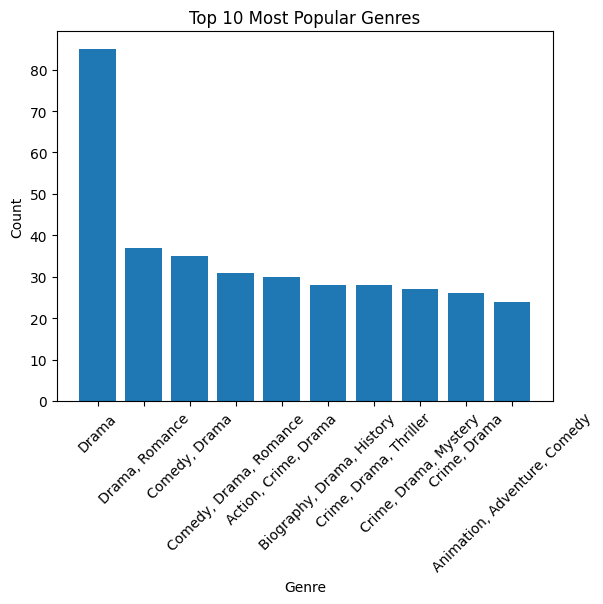

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

top_10_genres = genre_counts.sort_values('count', ascending=False).head(10)

# Create a bar chart using matplotlib
plt.bar(top_10_genres['Genre'], top_10_genres['count'])
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Top 10 Most Popular Genres')
plt.xticks(rotation=45)
plt.show()

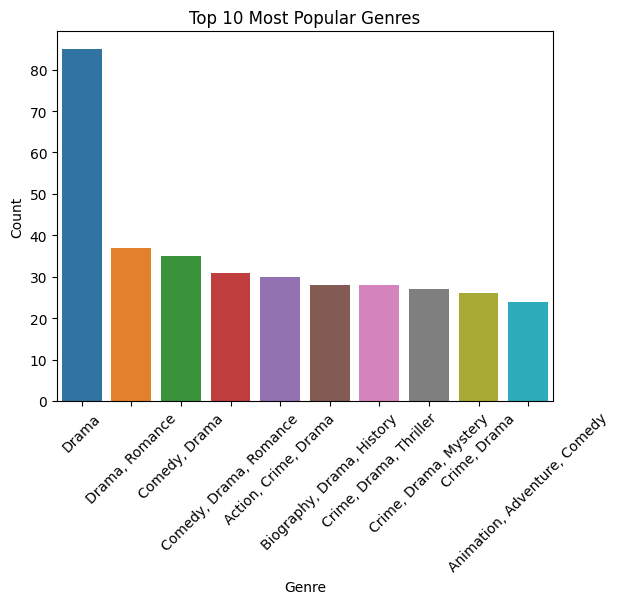

In [18]:
top_10_genres = genre_counts.sort_values('count', ascending=False).head(10)

sns.barplot(x='Genre', y='count', data=top_10_genres)
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Top 10 Most Popular Genres')
plt.xticks(rotation=45)
plt.show()

Director with the most top-rated movies/TV shows

In [21]:
director_counts = df['Director'].value_counts().reset_index()
director_counts.columns = ['Director', 'count']
director_with_most_top_rated = director_counts.loc[director_counts['count'].idxmax(), 'Director']
director_with_most_top_rated

'Alfred Hitchcock'

Visualize the data

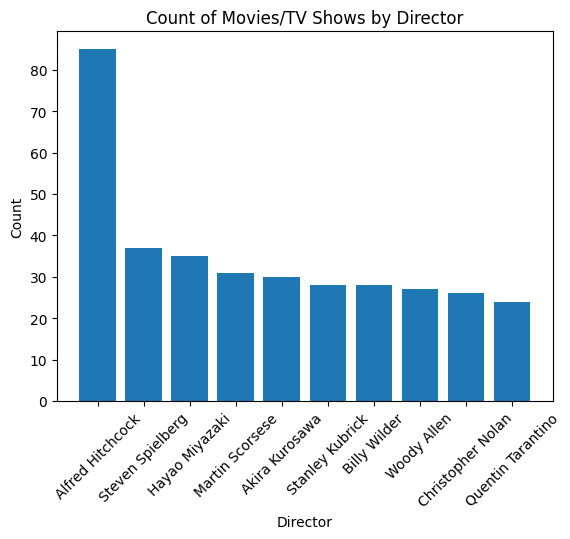

In [24]:
top_10_directors = director_counts.sort_values('count', ascending=False).head(10)

plt.bar(top_10_directors['Director'], top_10_genres['count'])
plt.xlabel('Director')
plt.ylabel('Count')
plt.title('Count of Movies/TV Shows by Director')
plt.xticks(rotation=45)
plt.show()

## Summarizing 

I think this data has a lot of interesting things that we can search for information through in general that helps us understand the attitude of people about films in which there is drama, and we see that I am the director Alfred Hitchcock as he has a high reservoir of films from the films recorded in this data anyway It was interesting to examine the data and see the data from a different angle to see its importance in increasing production and making money